In [1]:
# import numpy as np
import pandas as pd
import time
pd.options.mode.chained_assignment = None

In [2]:
dfile = pd.read_csv("data/Test Case Dataset.csv")
dfile

,TEST ID,TEST CASE,PRE-CONDITIONS,TEST STEPS,PRECEDENCE,TEST EFFORT,TEST DATA,EXPECTED RESULT,ACTUAL RESULT,PASS/FAIL
0,LOAD_001,Test Page load functionality through URL,None,Enter Invalid URL,H,8,NaN,NaN,NaN,NaN
1,LOAD_002,Test Page Reload without crashes,None,NaN,H,3,NaN,NaN,NaN,NaN
2,LOAD_003,Test 404 Error for Invalid URL in domain,None,NaN,L,7,NaN,NaN,NaN,NaN
3,SELECT_CITY_001,Test City Choice using Icons,LOAD_001,Choose city from name and icons,M,4,NaN,NaN,NaN,NaN
4,SELECT_CITY_002,Test Search City using Search Bar,LOAD_001,Choose city by Search Bar,M,6,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
95,BOOK_EVENT_003,Test Add & Remove person functionality,BOOK_EVENT_001,NaN,M,6,NaN,NaN,NaN,NaN
96,BOOK_EVENT_004,Test choice of seats,BOOK_EVENT_003,NaN,H,7,NaN,NaN,NaN,NaN
97,EVENT_CONFIRM_001,Test transfer to Payment Init,BOOK_EVENT_004,NaN,H,4,NaN,NaN,NaN,NaN
98,EVENT_CONFIRM_002,Test transfer to Confirmation Page after payment,PAY_PORTAL_003,NaN,H,4,NaN,NaN,NaN,NaN


## Data Pre-Processing

Firstly, we drop the columns which aren't necessary for the processing. We will combine it later, before the output.

In [3]:
dfile = dfile.drop(["TEST STEPS","TEST DATA","EXPECTED RESULT", "ACTUAL RESULT", "PASS/FAIL"], axis=1)
dfile

,TEST ID,TEST CASE,PRE-CONDITIONS,PRECEDENCE,TEST EFFORT
0,LOAD_001,Test Page load functionality through URL,None,H,8
1,LOAD_002,Test Page Reload without crashes,None,H,3
2,LOAD_003,Test 404 Error for Invalid URL in domain,None,L,7
3,SELECT_CITY_001,Test City Choice using Icons,LOAD_001,M,4
4,SELECT_CITY_002,Test Search City using Search Bar,LOAD_001,M,6
...,...,...,...,...,...
95,BOOK_EVENT_003,Test Add & Remove person functionality,BOOK_EVENT_001,M,6
96,BOOK_EVENT_004,Test choice of seats,BOOK_EVENT_003,H,7
97,EVENT_CONFIRM_001,Test transfer to Payment Init,BOOK_EVENT_004,H,4
98,EVENT_CONFIRM_002,Test transfer to Confirmation Page after payment,PAY_PORTAL_003,H,4


In [4]:
newdfile = pd.get_dummies(dfile['PRECEDENCE'])
dfile = pd.concat([dfile, newdfile], axis=1)
dfile.head()

,TEST ID,TEST CASE,PRE-CONDITIONS,PRECEDENCE,TEST EFFORT,H,L,M
0,LOAD_001,Test Page load functionality through URL,None,H,8,1,0,0
1,LOAD_002,Test Page Reload without crashes,None,H,3,1,0,0
2,LOAD_003,Test 404 Error for Invalid URL in domain,None,L,7,0,1,0
3,SELECT_CITY_001,Test City Choice using Icons,LOAD_001,M,4,0,0,1
4,SELECT_CITY_002,Test Search City using Search Bar,LOAD_001,M,6,0,0,1


In [5]:
PRE_CON_COUNT = [0]*dfile['TEST ID'].count()
dfile['PRE_CON_COUNT'] = PRE_CON_COUNT
dfile.head()

,TEST ID,TEST CASE,PRE-CONDITIONS,PRECEDENCE,TEST EFFORT,H,L,M,PRE_CON_COUNT
0,LOAD_001,Test Page load functionality through URL,None,H,8,1,0,0,0
1,LOAD_002,Test Page Reload without crashes,None,H,3,1,0,0,0
2,LOAD_003,Test 404 Error for Invalid URL in domain,None,L,7,0,1,0,0
3,SELECT_CITY_001,Test City Choice using Icons,LOAD_001,M,4,0,0,1,0
4,SELECT_CITY_002,Test Search City using Search Bar,LOAD_001,M,6,0,0,1,0


In [6]:
print(dfile['PRE-CONDITIONS'].unique())

['None' 'LOAD_001' 'SELECT_CITY_001' 'SELECT_CITY_002' 'SELECT_CITY_003'
 'HOME_001' 'SIGN_IN_001' 'SIGN_UP_001' 'SEARCHBAR_001' 'CATEGORY_001'
 'RECOMMEND_001' 'MOVIE_LOAD_001' 'BOOK_LOAD_001' 'SHOWTIME_001'
 'SHOWTIME_002' 'SEATS_001' 'SEATS_002' 'SEATS_003' 'PAY_BUTTON_001'
 'PAY_BUTTON_002' 'PAY_INIT_001' 'PAYMENT_OPT_003' 'MOB_WALLET_002'
 'VOUCHER_003' 'UPI_001' 'UPI_002' 'PAY_INIT_002' 'PAY_PORTAL_002'
 'PAY_PORTAL_003' 'CONFIRM_001' 'SESSION_002' 'SESSION_003' 'SESSION_001'
 'EVENT_DETAIL_001' 'EVENT_DETAIL_004' 'BOOK_EVENT_001' 'BOOK_EVENT_003'
 'BOOK_EVENT_004']


In [7]:
for i in dfile['PRE-CONDITIONS']:
    if (i in dfile['TEST ID'].values):
        print("Increase weightage of: ",i, end="\t")
        x = dfile.loc[dfile['TEST ID'] == i].index.values[0]
        print(" at row: ",x, end='\n')
        dfile['PRE_CON_COUNT'][x] = dfile['PRE_CON_COUNT'][x]+1

Increase weightage of:  LOAD_001	 at row:  0
Increase weightage of:  LOAD_001	 at row:  0
Increase weightage of:  LOAD_001	 at row:  0
Increase weightage of:  LOAD_001	 at row:  0
Increase weightage of:  SELECT_CITY_001	 at row:  3
Increase weightage of:  SELECT_CITY_002	 at row:  4
Increase weightage of:  SELECT_CITY_003	 at row:  5
Increase weightage of:  HOME_001	 at row:  6
Increase weightage of:  HOME_001	 at row:  6
Increase weightage of:  SIGN_IN_001	 at row:  11
Increase weightage of:  SIGN_IN_001	 at row:  11
Increase weightage of:  SIGN_IN_001	 at row:  11
Increase weightage of:  SIGN_UP_001	 at row:  14
Increase weightage of:  SIGN_UP_001	 at row:  14
Increase weightage of:  SIGN_IN_001	 at row:  11
Increase weightage of:  HOME_001	 at row:  6
Increase weightage of:  SEARCHBAR_001	 at row:  18
Increase weightage of:  SEARCHBAR_001	 at row:  18
Increase weightage of:  HOME_001	 at row:  6
Increase weightage of:  CATEGORY_001	 at row:  21
Increase weightage of:  SEARCHBAR_001	

In [8]:
print(dfile['PRE_CON_COUNT'].values)

[ 4  0  0  1  1  1  5  0  0  0  0  4  0  0  2  0  0  0  4  0  0  3  0  0
  0  1  0  0  3  0  0  0  2  0  1  1  2  1  1  0  1  2  9  0  0  0  0  0
  0 11  0  0  0  0  0  0  0  2  0  0  0  0  1  2  4  0  0  0  0  0  2  0
  4  2  0  6  0  0  0  0  0  0  0  0  1  1  1  0  0  3  0  0  1  2  0  1
  1  0  0  0]


In [9]:
dfile

,TEST ID,TEST CASE,PRE-CONDITIONS,PRECEDENCE,TEST EFFORT,H,L,M,PRE_CON_COUNT
0,LOAD_001,Test Page load functionality through URL,None,H,8,1,0,0,4
1,LOAD_002,Test Page Reload without crashes,None,H,3,1,0,0,0
2,LOAD_003,Test 404 Error for Invalid URL in domain,None,L,7,0,1,0,0
3,SELECT_CITY_001,Test City Choice using Icons,LOAD_001,M,4,0,0,1,1
4,SELECT_CITY_002,Test Search City using Search Bar,LOAD_001,M,6,0,0,1,1
...,...,...,...,...,...,...,...,...,...
95,BOOK_EVENT_003,Test Add & Remove person functionality,BOOK_EVENT_001,M,6,0,0,1,1
96,BOOK_EVENT_004,Test choice of seats,BOOK_EVENT_003,H,7,1,0,0,1
97,EVENT_CONFIRM_001,Test transfer to Payment Init,BOOK_EVENT_004,H,4,1,0,0,0
98,EVENT_CONFIRM_002,Test transfer to Confirmation Page after payment,PAY_PORTAL_003,H,4,1,0,0,0


In [10]:
print(dfile['PRE-CONDITIONS'].unique())

['None' 'LOAD_001' 'SELECT_CITY_001' 'SELECT_CITY_002' 'SELECT_CITY_003'
 'HOME_001' 'SIGN_IN_001' 'SIGN_UP_001' 'SEARCHBAR_001' 'CATEGORY_001'
 'RECOMMEND_001' 'MOVIE_LOAD_001' 'BOOK_LOAD_001' 'SHOWTIME_001'
 'SHOWTIME_002' 'SEATS_001' 'SEATS_002' 'SEATS_003' 'PAY_BUTTON_001'
 'PAY_BUTTON_002' 'PAY_INIT_001' 'PAYMENT_OPT_003' 'MOB_WALLET_002'
 'VOUCHER_003' 'UPI_001' 'UPI_002' 'PAY_INIT_002' 'PAY_PORTAL_002'
 'PAY_PORTAL_003' 'CONFIRM_001' 'SESSION_002' 'SESSION_003' 'SESSION_001'
 'EVENT_DETAIL_001' 'EVENT_DETAIL_004' 'BOOK_EVENT_001' 'BOOK_EVENT_003'
 'BOOK_EVENT_004']


## Finding Coupling factor

Coupling between 2 test cases can be found by `CbO = Number of links / Number of classes`

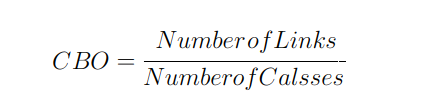

But, as we will not have any classes mentioned in the dataset, we are logically assuming the classes

In [11]:
cbo = len(dfile['PRE-CONDITIONS'].unique())

## Adding Weightage column

Weightage column is to find the overall weightage of that particular test case with respect to the factors influencing it

In [12]:
weightage = [0]*dfile['TEST ID'].count()
dfile['WEIGHTAGE'] = weightage

In [13]:
dfile.head()

,TEST ID,TEST CASE,PRE-CONDITIONS,PRECEDENCE,TEST EFFORT,H,L,M,PRE_CON_COUNT,WEIGHTAGE
0,LOAD_001,Test Page load functionality through URL,None,H,8,1,0,0,4,0
1,LOAD_002,Test Page Reload without crashes,None,H,3,1,0,0,0,0
2,LOAD_003,Test 404 Error for Invalid URL in domain,None,L,7,0,1,0,0,0
3,SELECT_CITY_001,Test City Choice using Icons,LOAD_001,M,4,0,0,1,1,0
4,SELECT_CITY_002,Test Search City using Search Bar,LOAD_001,M,6,0,0,1,1,0


As the main factors influencing the a test case would be the pre-condition and precedence, we take those values. The pre-condition weightage is assigned along with it's coupling factor.

In [14]:
dfile['WEIGHTAGE'] = (dfile['H']*0.9 + dfile['M']*0.5 + dfile['L']*0.1 + (dfile['PRE_CON_COUNT']/cbo))*dfile['TEST EFFORT']
dfile

,TEST ID,TEST CASE,PRE-CONDITIONS,PRECEDENCE,TEST EFFORT,H,L,M,PRE_CON_COUNT,WEIGHTAGE
0,LOAD_001,Test Page load functionality through URL,None,H,8,1,0,0,4,8.042105
1,LOAD_002,Test Page Reload without crashes,None,H,3,1,0,0,0,2.700000
2,LOAD_003,Test 404 Error for Invalid URL in domain,None,L,7,0,1,0,0,0.700000
3,SELECT_CITY_001,Test City Choice using Icons,LOAD_001,M,4,0,0,1,1,2.105263
4,SELECT_CITY_002,Test Search City using Search Bar,LOAD_001,M,6,0,0,1,1,3.157895
...,...,...,...,...,...,...,...,...,...,...
95,BOOK_EVENT_003,Test Add & Remove person functionality,BOOK_EVENT_001,M,6,0,0,1,1,3.157895
96,BOOK_EVENT_004,Test choice of seats,BOOK_EVENT_003,H,7,1,0,0,1,6.484211
97,EVENT_CONFIRM_001,Test transfer to Payment Init,BOOK_EVENT_004,H,4,1,0,0,0,3.600000
98,EVENT_CONFIRM_002,Test transfer to Confirmation Page after payment,PAY_PORTAL_003,H,4,1,0,0,0,3.600000


In [15]:
print(dfile['PRE_CON_COUNT'].sum())

94


In [16]:
print( dfile['WEIGHTAGE'].max())

8.042105263157895


## Find Best values using PSO

We apply PSO to find the best values obtainable for Weightage of a test case

In [17]:
# pso_time = time.time()

In [18]:
def PSO_init(self, func, dim, pop=40, max_iter=150, lb=None, ub=None, w=0.8, c1=0.5, c2=0.5):
        self.func = func
        self.w = w  # inertia
        self.cp, self.cg = c1, c2  # parameters to control personal best, global best respectively
        self.pop = pop  # number of particles
        self.dim = dim  # number of function variables
        self.max_iter = max_iter  # maximum iterations

        self.has_constraints = not (lb is None and ub is None)
        self.lb = -np.ones(self.dim) if lb is None else np.array(lb)
        self.ub = np.ones(self.dim) if ub is None else np.array(ub)
        assert self.dim == len(self.lb) == len(self.ub), 'dim == len(lb) == len(ub) is not True'
        assert np.all(self.ub > self.lb), 'upper-bound must be greater than lower-bound'

        self.X = np.random.uniform(low=self.lb, high=self.ub, size=(self.pop, self.dim))
        v_high = self.ub - self.lb
        self.V = np.random.uniform(low=-v_high, high=v_high, size=(self.pop, self.dim))  # speed of particles
        self.Y = self.cal_y()  # y = f(x) for all particles
        self.pbest_x = self.X.copy()  # personal best location of every particle in history
        self.pbest_y = self.Y.copy()  # best image of every particle in history
        self.gbest_x = np.zeros((1, self.dim))  # global best location for all particles
        self.gbest_y = 0  # global best y for all particles
        self.gbest_y_hist = []  # gbest_y of every iteration
        self.update_gbest()

def cal_y(self):
#     Calculate a Y for each X
    self.Y = self.func(self.X).reshape(-1, 1)
    return self.Y

def update_X(self):
    return

def update_V(self):
    return

def updatePbest(self):
    self.pbest_x = np.where(self.pbest_y > self.Y, self.X, self.pbest_x)
    self.pbest_y = np.where(self.pbest_y > self.Y, self.Y, self.pbest_y)

def updateGbest(self):
    if self.gbest_y < self.Y.max():
        self.gbest_x = self.X[self.Y.argmax(), :].copy()
        self.gbest_y = self.Y.max()

In [19]:
# print("--- %f seconds was taken ---" % (time.time() - pso_time))

## Compare with current weightage and order

## Present dataset after Ordering

## Find Best values using Another Meta-Heuristic algorithm

## Re-arrange dataset

## Comparative Analysis

In [20]:
# Convert to python3 script file

# !jupyter nbconvert --to script Test\ Case\ Opt.ipynb